Grade=97/100

# Elizabeth Chambers

# Lab 7

# Abstract
This report presents data taken from the radio telescope (azimuth, flux, and galaxy). The ultimate goal is to make a rotation curve of the Milky Way Galaxy. To do this, we focus on the 21cm line of hydrogen. This line is created by a change in the enrgy state of neutral hydrogen atoms. The frequency of this radiation is 1,429,405,751.7667 +/- 0.009 Hz, which is equivalent ot the vacuum wavelength of 21 cm H in free space.
Using the frequency of the 21 cm H line, we calculate for velocity. Using the doppler shift that each of these lines has we can calculate the relative speed of each arm of our galaxy.

# Introduction
The purpose of this lab is to gain hands-on experience in radio astronomy using the Small Radio Telescope. For this lab, it is important to understand the applications of the 21 cm Hydrogen line that were discussed in the abstract. This emission line can be used to find the velocity of objects such as the sun and other stars using the doppler shift. This is the basis for how we found the galactic rotation curve of the Milky Way in this lab.

# Methods
After solving for the velocity of using the doppler shift we must solve for OUR(the Earth's) velocity relative to the doppler velocities we have found. To do this we use the formulas R = R_0sin(g), and V_0sin(theta) we then add this velocity to our found velocities because we are moving in the same direction as the rest of the arm.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io
from scipy.optimize import curve_fit
import math
from scipy.interpolate import UnivariateSpline
%matplotlib inline

In [40]:
#Opening and averaging elevation file


root = '/n/Users/beechamb/Desktop/'
nums = []
el_1 = open(root+'sun_elevation/sun_el_m1')
datalines = [3,7,11,15,19,23,27,31,35,39]
with el_1 as obj:
    lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        nums.append(data)
avgel = np.average(nums,axis=0)

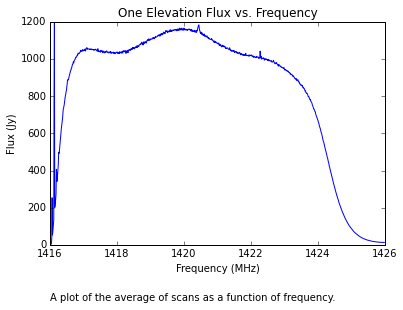

In [42]:
#Plotting average of scans as a function of frequency.
freq = np.arange(1416,1426,0.009766)
plt.plot(freq,avgel)
plt.title('One Elevation Flux vs. Frequency')
txt = """A plot of the average of scans as a function of frequency."""
plt.text(1416,-300,txt)
plt.ylabel('Flux (Jy)')
plt.ylim(0,1200)
plt.xlabel('Frequency (MHz)')
plt.show()

In [43]:
#Importing elevation data
elevations = ['sun_el_m5','sun_el_m4','sun_el_m3','sun_el_m2','sun_el_m1','sun_el_p1','sun_el_p2','sun_el_p3',
              'sun_el_p4','sun_el_p5','sun_el_p6','sun_el_p7','sun_el_p8','sun_el_p9','sun_el_p10']

avgel = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(elevations)):
    num = []
    el = open(root+'sun_elevation/'+elevations[i])
    with el as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        num.append(data)
    avgel.append(np.average(num,axis=0))

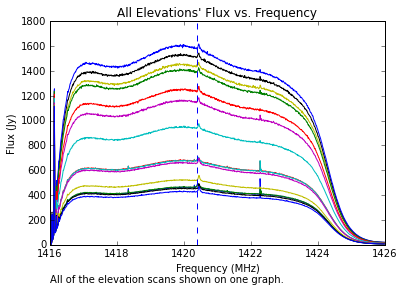

In [44]:
#Plotting all scans on one graph
for i in range(len(avgel)):
    plt.plot(freq,avgel[i])
plt.title('All Elevations\' Flux vs. Frequency')
txt = """All of the elevation scans shown on one graph."""
plt.text(1416,-300,txt)
plt.ylabel('Flux (Jy)')
plt.axvline(1420.4,linestyle='--') #this is the frequency of 21cm radiation in MHz
plt.xlabel('Frequency (MHz)')
plt.show()


In [45]:
#Determining peak 21cm radiation flux for each line.
tomax = []
for i in range(len(avgel)):
    blah = max(avgel[i][100:1000])
    tomax.append(blah)
offsets = [-5.,-4.,-3.,-2.,-1.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,]

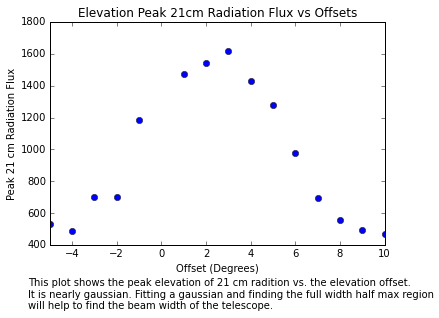

In [46]:
#Plotting found data
plt.plot(offsets,tomax,'o')
plt.xlim(-5,10)
plt.xlabel('Offset (Degrees)')
plt.ylabel('Peak 21 cm Radiation Flux')
plt.title('Elevation Peak 21cm Radiation Flux vs Offsets')
txt = """This plot shows the peak elevation of 21 cm radition vs. the elevation offset.
It is nearly gaussian. Fitting a gaussian and finding the full width half max region
will help to find the beam width of the telescope."""
plt.text(-6,0.1,txt)
plt.show()

Estimated Beam Width = 9.98370683164 degrees.


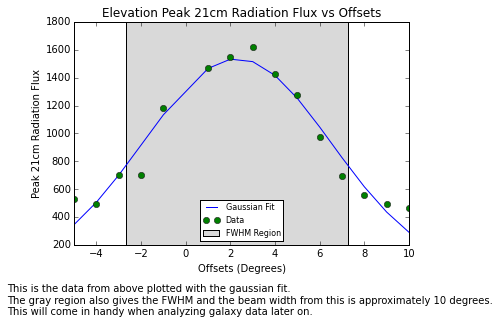

In [47]:
def gauss_function(offsets, a, x0, sigma):
    return a*np.exp(-(offsets-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, offsets, tomax)

spline = UnivariateSpline(offsets, gauss_function(offsets, *popt)-(np.max(gauss_function(offsets, *popt))/2))
r1, r2 = spline.roots()

print 'Estimated Beam Width = ' + str(r2-r1) + ' degrees.'
plt.plot(offsets, gauss_function(offsets, *popt),label='Gaussian Fit')
plt.plot(offsets,tomax,'o',label='Data')
plt.axvspan(r1, r2, facecolor = '0.85',label='FWHM Region')
plt.xlabel('Offsets (Degrees)')
plt.ylabel('Peak 21cm Radiation Flux')
plt.title('Elevation Peak 21cm Radiation Flux vs Offsets')
plt.legend(loc = 8,fontsize=8)
txt = """This is the data from above plotted with the gaussian fit. 
The gray region also gives the FWHM and the beam width from this is approximately 10 degrees.
This will come in handy when analyzing galaxy data later on."""
plt.text(-8,-300,txt)
plt.xlim(-5,10)
plt.show()

In [48]:
#Getting azimuth data
azimuths = ['sun-9_0.dat','sun-8_0.dat','sun-7_0.dat','sun0_-6.dat','sun-6_0.dat','sun-5_0.dat',
            'sun-4_0.dat','sun-3_0.dat','sun-2_0.dat','sun-1_0.dat','sun0_0.dat',
            'sun1_0.dat','sun2_0.dat','sun3_0.dat','sun4_0.dat','sun5_0.dat','sun6_0.dat',
            'sun7_0.dat','sun8_0.dat','sun9_0.dat','sun10_0.dat']
avgaz = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(azimuths)):
    num = []
    az = open(root+'sun_azimuth/'+azimuths[i])
    with az as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        num.append(data)
    avgaz.append(np.average(num,axis=0))
    

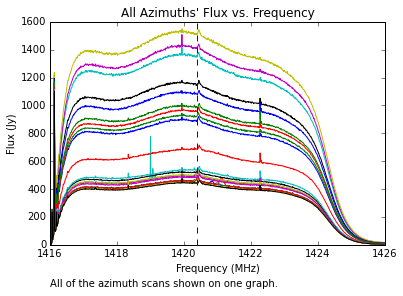

In [49]:
#Plotting azimuth data
for i in range(len(avgaz)):
    plt.plot(freq,avgaz[i])
plt.title('All Azimuths\' Flux vs. Frequency')
txt = """All of the azimuth scans shown on one graph."""
plt.text(1416,-300,txt)
plt.ylabel('Flux (Jy)')
plt.axvline(1420.4,linestyle='--') #this is the frequency of 21cm radiation in MHz
plt.xlabel('Frequency (MHz)')
plt.show()

In [50]:
tomaxaz = []
for i in range(len(avgaz)):
    blah = max(avgaz[i][100:1000])
    tomaxaz.append(blah)
    


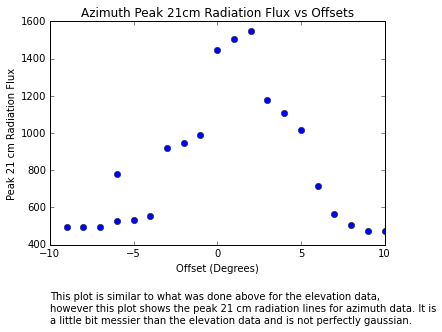

In [51]:
offaz = [-9,-8,-7,-6,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
plt.plot(offaz,tomaxaz,'o')
plt.xlabel('Offset (Degrees)')
plt.ylabel('Peak 21 cm Radiation Flux')
plt.title('Azimuth Peak 21cm Radiation Flux vs Offsets')
txt = """This plot is similar to what was done above for the elevation data,
however this plot shows the peak 21 cm radiation lines for azimuth data. It is
a little bit messier than the elevation data and is not perfectly gaussian."""
plt.text(-10,-20,txt)
plt.show()

Estimated Beam Width = 12.8318357606 degrees.


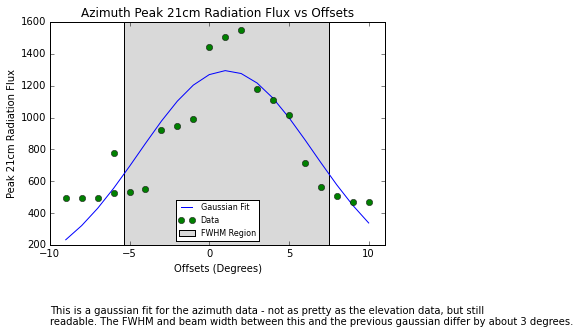

In [52]:
def gauss_functionz(offaz, a, x0, sigmaz):
    return a*np.exp(-(offaz-x0)**2/(2*sigmaz**2))
popt, pcov = curve_fit(gauss_functionz, offaz, tomaxaz)

splinez = UnivariateSpline(offaz, gauss_functionz(offaz, *popt)-(np.max(gauss_functionz(offaz, *popt))/2))
r1z, r2z = splinez.roots()
print 'Estimated Beam Width = ' + str(r2z-r1z) + ' degrees.'

plt.plot(offaz, gauss_functionz(offaz, *popt),label='Gaussian Fit')
plt.plot(offaz,tomaxaz,'o',label='Data')
plt.axvspan(r1z,r2z, facecolor = '0.85',label='FWHM Region')
plt.xlabel('Offsets (Degrees)')
plt.ylabel('Peak 21cm Radiation Flux')
plt.title('Azimuth Peak 21cm Radiation Flux vs Offsets')
txt = """This is a gaussian fit for the azimuth data - not as pretty as the elevation data, but still
readable. The FWHM and beam width between this and the previous gaussian differ by about 3 degrees."""
plt.text(-10,-300,txt)
plt.legend(loc = 8,fontsize=8)
plt.xlim(-10,11)
plt.show()

In [53]:
#Importing calibration data with similar procedure used to import other data
cal = ['calib_5m.dat']
avgcal = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(cal)):
    num = []
    c = open(root+'Radio_Data_Galaxy/'+cal[i])
    with c as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        num.append(data)
    avgcal.append(np.average(num,axis=0))

In [54]:
#Importing galaxy data
galaxy = ['Gal_0_5m.dat','Gal10_5m.dat','Gal20_5m.dat','Gal30_5m.dat','Gal40_5m.dat',
          'Gal50_5m.dat','Gal60_5m.dat','Gal70_5m.dat','Gal80_5m.dat','Gal90_5m.dat']
avggal = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(galaxy)):
    num = []
    g = open(root+'Radio_Data_Galaxy/'+galaxy[i])
    with g as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        num.append(data)
    avggal.append(np.average(num,axis=0))
avgal = []
for i in range(len(avggal)):
    new = avggal[i]-avgcal[0]
    avgal.append(new)

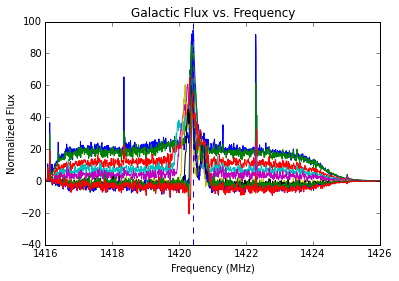

In [55]:
#This plot is similar to those above that show all the scans on one image.
for i in range(len(avgal)):
    plt.plot(freq,avgal[i])
plt.title('Galactic Flux vs. Frequency')
plt.ylabel('Normalized Flux')
plt.axvline(1420.4,linestyle='--') #this is the frequency of 21cm radiation in MHz
plt.xlabel('Frequency (MHz)')
plt.show()

In [56]:
#Finding the minimum velocity by zooming in on a data. The actual 21cm velocity was subtracted from
#this, by calculating doppler  velocities.
tocm = 1420.4
tomaxg = [1420.3,1420.2,1419.8,1419.8,1419.9,1420,1420.1,1420.3,1420.3,1420.3]
tocmin = []
for i in range(len(tomaxg)):
    new = tocm-tomaxg[i]
    tocmin.append(new)
tocv = []
for i in range(len(tocmin)):
    n = (tocmin[i]/tocm)*2.99e5
    tocv.append(n)

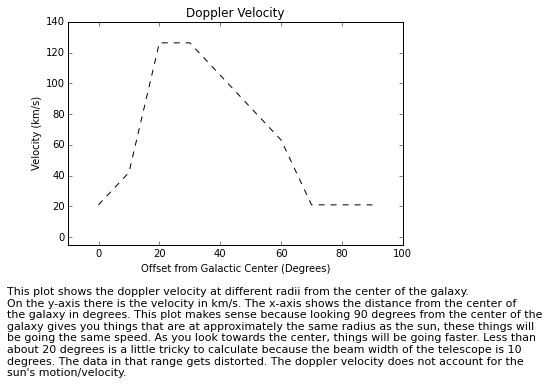

In [57]:
degs = np.arange(0,100,10)
plt.plot(degs,tocv,'k--')
plt.xlim(-10,100)
plt.ylim(-5,140)
plt.xlabel('Offset from Galactic Center (Degrees)')
plt.ylabel('Velocity (km/s)')
plt.title('Doppler Velocity')
txt = """This plot shows the doppler velocity at different radii from the center of the galaxy. 
On the y-axis there is the velocity in km/s. The x-axis shows the distance from the center of 
the galaxy in degrees. This plot makes sense because looking 90 degrees from the center of the 
galaxy gives you things that are at approximately the same radius as the sun, these things will 
be going the same speed. As you look towards the center, things will be going faster. Less than 
about 20 degrees is a little tricky to calculate because the beam width of the telescope is 10 
degrees. The data in that range gets distorted. The doppler velocity does not account for the 
sun's motion/velocity."""
plt.text(-30,-90,txt,color='k',fontsize=11)
plt.show()

In [58]:
#Adjusting to find real velocities
ro = 8
vo = 230
v = []
r = []
for i in range(len(tocv)):
    new = abs((vo+tocv[i])*np.sin(np.deg2rad(degs[i])))
    v.append(new)
for i in range(len(degs)):
    new = abs(ro*np.sin(np.deg2rad(degs[i])))
    r.append(new)

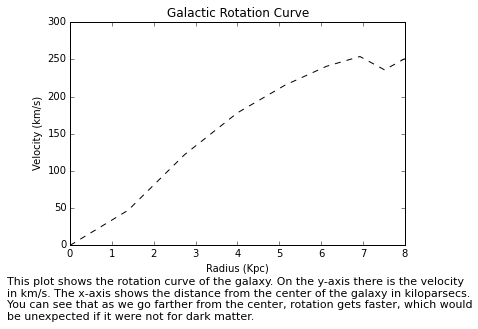

In [59]:
plt.plot(r,v,'k--')
plt.xlabel('Radius (Kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Galactic Rotation Curve')
txt = """This plot shows the rotation curve of the galaxy. On the y-axis there is the velocity 
in km/s. The x-axis shows the distance from the center of the galaxy in kiloparsecs. 
You can see that as we go farther from the center, rotation gets faster, which would 
be unexpected if it were not for dark matter."""
plt.text(-1.5,-100,txt,color='k',fontsize=11)
plt.show()

# Results
Through this experiment we found what we expected to find - that there is dark matter in the galaxy. If there weren't
we would not have the velocities that were calculated to make the galactic rotation curve. Without the presence of dark matter in our galaxy we would not expect rotation to get faster towards the center of the galaxy. However, that is the case and there is in fact dark matter (or something like it) present in the galaxy.

# Conclusion
Overall the experiment succeeded in showing that there is dark matter in the galaxy through calculations using brightness, flux, doppler shift, and 21cm peak radiation lines. I think this is the most interesting lab we have done all semester, it has been interesting to see some applications of things we learned in Astro 201 and other classes like 402/Galaxies.